![](https://www.zmp.eu/wp-content/uploads/2024/10/Pink-October-Breast-Cancer-Template-Instagram-Post-1500-x-843-px-1024x575.png)

# **Introduction**



# Breast Cancer Detection: Model Comparison and Performance Analysis

### Breast cancer is not just a medical condition; it’s a deeply personal struggle that affects countless women and their loved ones worldwide. Early detection of breast cancer can mean the difference between life and loss, hope and despair. Through advancements in data science and machine learning, we have an unprecedented opportunity to aid in this fight by developing tools that can identify signs of cancer with accuracy, potentially saving lives and giving more women the chance to overcome this disease. 

# Objectives
### The primary goals of this analysis are:

* ### **Exploratory Data Analysis (EDA):** 
#### Identify important features and understand how they correlate with diagnoses to lay a foundation for model development.

* ### **Model Development:** 
#### Compare classification models (Logistic Regression, Decision Tree, Random Forest, SVM, and Neural Network) to gauge their performance in distinguishing benign and malignant cases.

* ### **Model Performance Evaluation:** 
#### Use metrics including Test Accuracy, Precision, Recall, F1 Score, and ROC-AUC to evaluate each model's effectiveness, with a focus on real-world applicability.

* ### **Recommendations for Clinical Practice:** 
#### Based on the findings, provide insights on which models might serve as reliable tools for early cancer screening and suggest areas for model optimization in breast cancer detection.

# Practical Applications
### The conclusions from this notebook can be applied in various ways:

* ### **Early Detection in Screening Programs:** 
#### Using high-accuracy models in clinical tools can improve early detection rates, especially in high-risk populations.
* ### **Resource Optimization:** 
#### By identifying models that achieve high recall (sensitivity), we can reduce false negatives, ensuring that fewer malignant cases go undetected.
* ### **Educating Patients:** 
#### Using interpretable models like Decision Trees can help convey risk factors to patients, increasing awareness about signs and symptoms of breast cancer.

# In this notebook,
### We will explores a dataset of breast cancer characteristics, analyzing various machine learning models to evaluate their effectiveness in predicting cancer diagnoses as benign or malignant. By assessing key metrics such as accuracy, precision, recall, F1 score, and ROC-AUC, we aim to identify the models best suited for reliable cancer detection and we harness the power of data to explore models that could become part of life-saving diagnostic tools, working toward a future where breast cancer is detected sooner, treated more effectively, and feared less.

# **Important Libraries**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

# **Read Data**

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Exploring Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df = df.drop(columns='id')

In [5]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


* ## **Undersatnd Dataset Statistically**

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* ## **Missing Values**

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

* ## **Data Skewness**

In [8]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate the skewness for each numeric column
skewness_values = numeric_cols.apply(lambda x: x.skew())

# Print the skewness value for each column
print("Skewness for each column:")
print(skewness_values)

Skewness for each column:
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
co

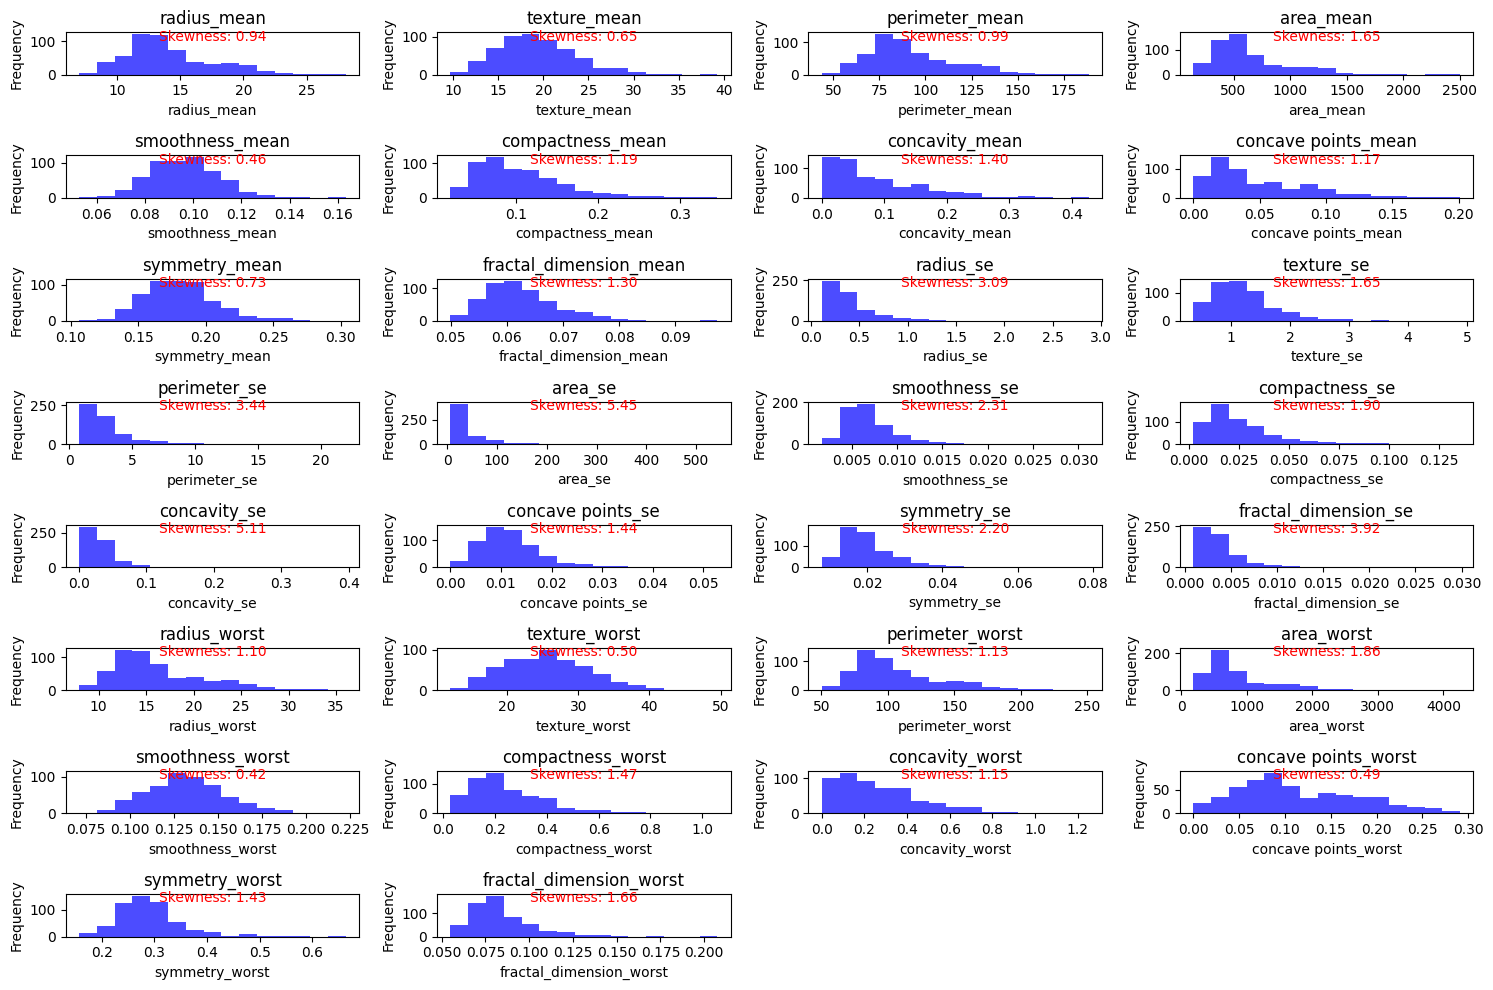

In [9]:
# Determine the number of rows and columns for subplots
num_cols_count = len(numeric_cols.columns)
num_rows = (num_cols_count + 3) // 4  # Adjust the number of rows for a max of 4 columns per row
num_cols = min(4, num_cols_count)  # Set a maximum of 4 columns per row

# Plot histograms for each numeric column with skewness value
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(numeric_cols.columns):
    axes[i].hist(numeric_cols[col], bins=15, color='blue', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Get the skewness value for the column
    skew_val = skewness_values[col]
    
    # Display skewness value in the plot
    axes[i].text(0.5, 0.9, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                 verticalalignment='center', transform=axes[i].transAxes, fontsize=10, color='red')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* ## **Data Balanced ?**

In [10]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Diagnosis Questions for Awareness

## 1. Analysis of the distribution of key characteristics between benign and malignant tumors?
تحليل توزيع الخصائص الأساسية بين الأورام الحميدة والخبيثة



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

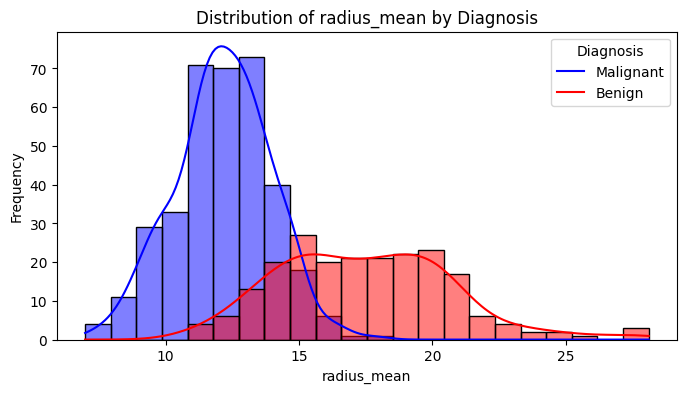

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

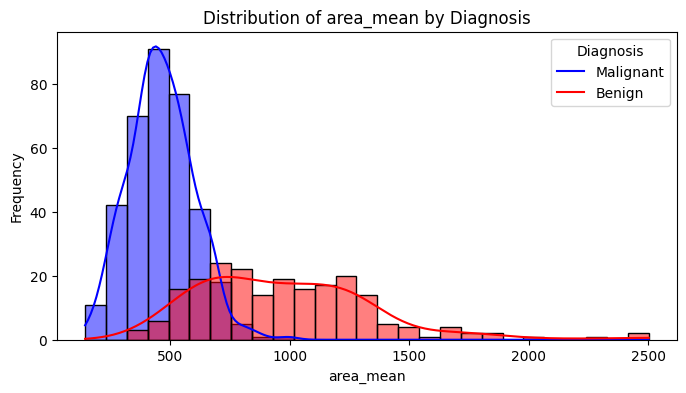

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

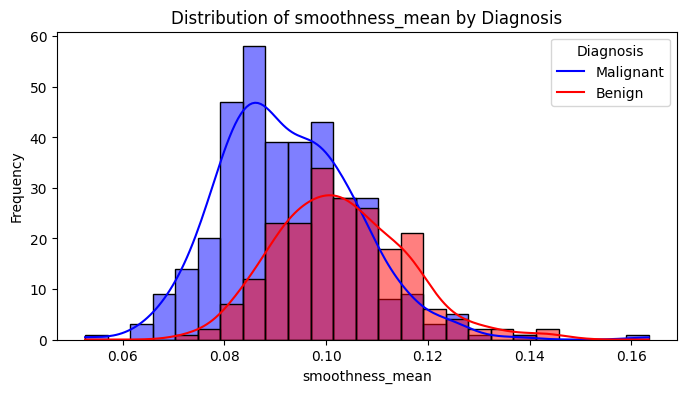

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

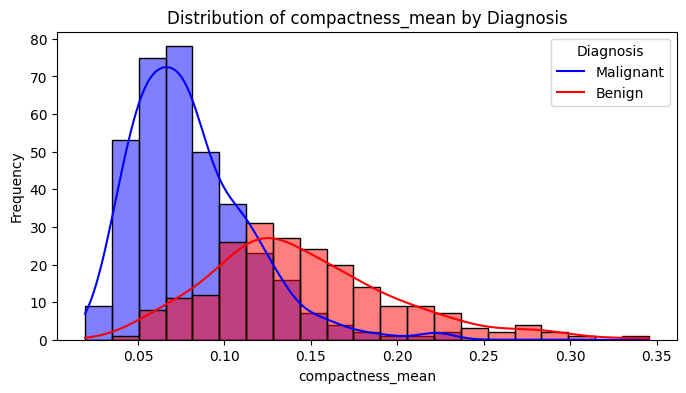

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

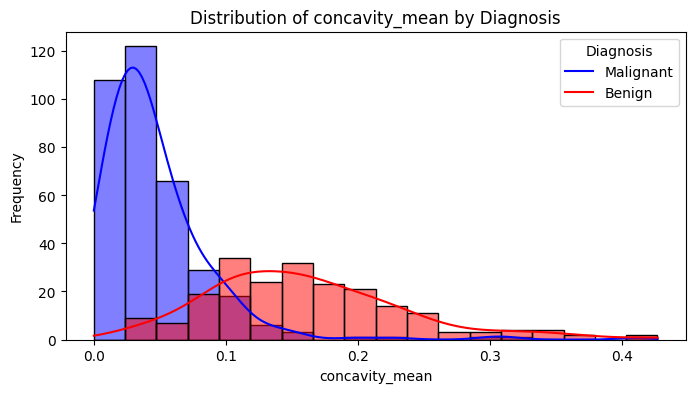

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

key_features = ['radius_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']

for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette={'M': 'red', 'B': 'blue'})
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Diagnosis', labels=['Malignant', 'Benign'])
    plt.show()


* ### Results Analysis


In [12]:
key_features = ['radius_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']
mean_values_by_diagnosis = df.groupby('diagnosis')[key_features].mean()

print("Average values of key features by diagnosis:")
print(mean_values_by_diagnosis)

Average values of key features by diagnosis:
           radius_mean   area_mean  smoothness_mean  compactness_mean  \
diagnosis                                                               
B            12.146524  462.790196         0.092478          0.080085   
M            17.462830  978.376415         0.102898          0.145188   

           concavity_mean  
diagnosis                  
B                0.046058  
M                0.160775  


### **Radius Mean:**

B (Benign): 12.15
M (Malignant): 17.46

Analysis: The mean radius of malignant tumors is significantly larger than that of benign tumors. This suggests that malignant tumors tend to be larger in size.
 
* Advice: Women with any lumps or growths in their breasts should follow up with regular check-ups, especially if the lump is larger than the average (approximately 12.15).
* يجب على النساء اللاتي يمتلكن كتلة أو نمو في الثدي أن يتابعن الفحوصات الدورية، خاصة إذا كانت الكتلة أكبر من الطبيعى


### **Area Mean:**

B: 462.79
M: 978.38

Analysis: There is a significant difference in the area of tumors between the two types, with malignant tumors being much larger.

* Advice: Women need to monitor any changes in size or lumps in their breasts, as an increase in area may indicate the possibility of a malignant tumor.
* النساء بحاجة لمراقبة أي تغييرات في الحجم أو الكتل في الثدي، حيث أن زيادة المساحة قد تشير إلى احتمالية وجود ورم خبيث.


### **Smoothness Mean:**

B: 0.0925
M: 0.1029

Analysis: The difference in smoothness of the tumors between benign and malignant is small but present. Malignant tumors are usually less smooth.

* Advice: Attention should be given to any lumps or areas in the breast that appear less smooth or irregular.
* يجب الانتباه إلى أي كتل أو مناطق في الثدي تبدو أقل نعومة أو غير منتظمة.

### **Compactness Mean:**

B: 0.0801
M: 0.1452

Analysis: The average compactness value is higher in malignant tumors, indicating that malignant tumors tend to be denser.

* Advice: If women feel hard or irregular lumps, they should seek medical examination.
* إذا شعرت النساء بكتل صلبة أو غير منتظمة، يجب أن يتوجهن لفحص طبي


### **Concavity Mean:**

B: 0.0461
M: 0.1608

Analysis: Malignant tumors show a clear increase in concavity, making them more indented.

* Advice: Women need to monitor any changes in the shape or indentation of their breasts, which requires medical review.
* النساء بحاجة لمراقبة أي تغييرات في شكل أو انحناء الثدي، وهذا يتطلب مراجعة طبية.


## 2. Is there a relationship between increased concavity or compactness and a higher likelihood of malignant tumors?
هل هناك علاقة بين زيادة التقعر (concavity) أو الكثافة (compactness) وارتفاع احتمالية الإصابة بورم خبيث؟

In [13]:
compact_concave = df.groupby('diagnosis')[['compactness_mean', 'concavity_mean']].mean()
print("Average compactness and concavity by diagnosis:\n", compact_concave)


Average compactness and concavity by diagnosis:
            compactness_mean  concavity_mean
diagnosis                                  
B                  0.080085        0.046058
M                  0.145188        0.160775


* ### Results Analysis


**Compactness:**

The average compactness for malignant tumors is significantly higher (0.1452) compared to benign tumors (0.0801). This suggests that malignant tumors tend to have a more irregular shape, indicating a potential increase in density.

* Advice: Women should be vigilant about any lumps that feel unusually firm or irregular, as increased compactness may be a sign of a higher risk of malignancy.
*  يجب على النساء أن يكونوا حذرين بشأن أي كتل تبدو صلبة أو غير منتظمة، حيث إن زيادة الكثافة قد تكون علامة على خطر أعلى للإصابة بالسرطان

**Concavity:**

The average concavity for malignant tumors is also higher (0.1608) than that for benign tumors (0.0461). This implies that malignant tumors may exhibit more pronounced concave features, which could indicate a more aggressive growth pattern.

* Advice: Women should monitor any changes in the contour of their breasts. If any areas appear more indented or irregular, it is advisable to seek medical attention.
* يجب على النساء مراقبة أي تغييرات في شكل الثدي. إذا كانت هناك أي مناطق تبدو أكثر انحدارًا أو غير منتظمة، فمن المستحسن استشارة طبيب.

## 3. Do malignant tumors exhibit a less symmetrical and more complex pattern?
هل تظهر الأورام الخبيثة نمطًا أقل تناظرًا وأعلى تعقيدًا؟

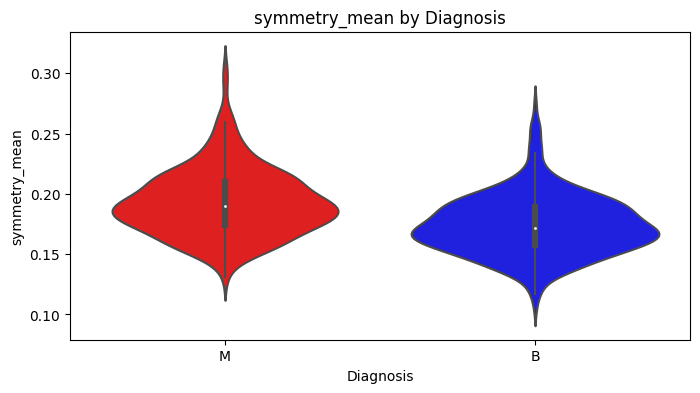

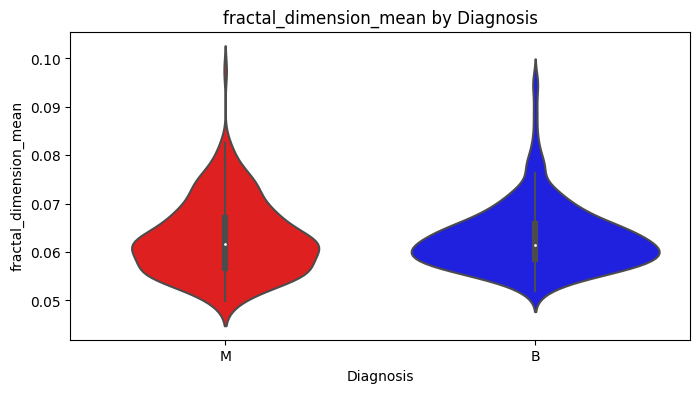

In [14]:
symmetry_features = ['symmetry_mean', 'fractal_dimension_mean']

for feature in symmetry_features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='diagnosis', y=feature, data=df, palette={'M': 'red', 'B': 'blue'})
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    plt.show()


* ### Results Analysis

In [15]:
symmetry_features = ['symmetry_mean', 'fractal_dimension_mean']
mean_values = df.groupby('diagnosis')[symmetry_features].mean()

std_values = df.groupby('diagnosis')[symmetry_features].std()
min_values = df.groupby('diagnosis')[symmetry_features].min()
max_values = df.groupby('diagnosis')[symmetry_features].max()

symmetry_stats = pd.concat([mean_values, std_values.rename(columns=lambda x: f'{x}_std'),
                             min_values.rename(columns=lambda x: f'{x}_min'),
                             max_values.rename(columns=lambda x: f'{x}_max')], axis=1)

print("Statistics for symmetry and fractal dimension by diagnosis:\n")
symmetry_stats


Statistics for symmetry and fractal dimension by diagnosis:



,symmetry_mean,fractal_dimension_mean,symmetry_mean_std,fractal_dimension_mean_std,symmetry_mean_min,fractal_dimension_mean_min,symmetry_mean_max,fractal_dimension_mean_max
diagnosis,,,,,,,,
B,0.174186,0.062867,0.024807,0.006747,0.1060,0.05185,0.2743,0.09575
M,0.192909,0.062680,0.027638,0.007573,0.1308,0.04996,0.3040,0.09744


### **Mean Symmetry:**
The mean symmetry for malignant tumors (0.1929) is higher than that for benign tumors (0.1742).

* Analysis: This indicates that malignant tumors tend to be more asymmetrical, which may be a sign of aggressive behavior.
* Advice: Women should monitor any asymmetry in breast tissue and discuss any concerns with their healthcare providers.
*  لازم تراقبي أي عدم تناظر في أنسجة الثدي ويفضل تتكلمي مع دكتورك لو عندك أي مخاوف.


### **Mean Fractal Dimension:**
The mean fractal dimension is similar between the two groups, with benign at 0.0629 and malignant at 0.0627.

* Analysis: These values suggest that the overall complexity of shape is comparable between benign and malignant tumors.
* Advice: Women should be aware that fractal dimension may indicate shape characteristics of the tumor and should follow up on any changes.
* كوني واعية إن الأبعاد الكسرية ممكن تدل على شكل الورم، ولازم تتابعي أي تغييرات.

### **Standard Deviation:**
The standard deviation for mean symmetry is slightly higher in malignant tumors (0.0276) compared to benign (0.0248).

* Analysis: This suggests greater variability in measurements of malignant tumors, which may reflect differences in biological behavior.
* Advice: Women should pay attention to any unusual changes in the breast and report them to healthcare providers.
* ده يعني إن الأورام الخبيثة فيها اختلافات أكبر في القياسات، وده ممكن يعكس سلوكها البيولوجي و لازم تنتبهي لأي تغيرات غير طبيعية في الثدي وتبلغي دكتورك عنها

### **Minimum and Maximum Values:**
The minimum mean symmetry for malignant tumors (0.1308) is higher than that for benign tumors (0.1060).

* Analysis: Even the least symmetrical malignant tumors have a higher mean symmetry than benign tumors.
* Advice: Women should consult their doctors if they notice any changes in shape or symmetry.
* يعني حتى الأورام الخبيثة الأقل تناظرًا عندها متوسط أعلى من الأورام الحميدة ولو لاحظتي أي تغييرات في الشكل أو التناظر، اتصلي بدكتورك.


## 4.**What is the most Features that affect Breast Cancer Features?**

In [16]:
# Convert the diagnosis column into numerical values
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Display the first few rows to confirm the change
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


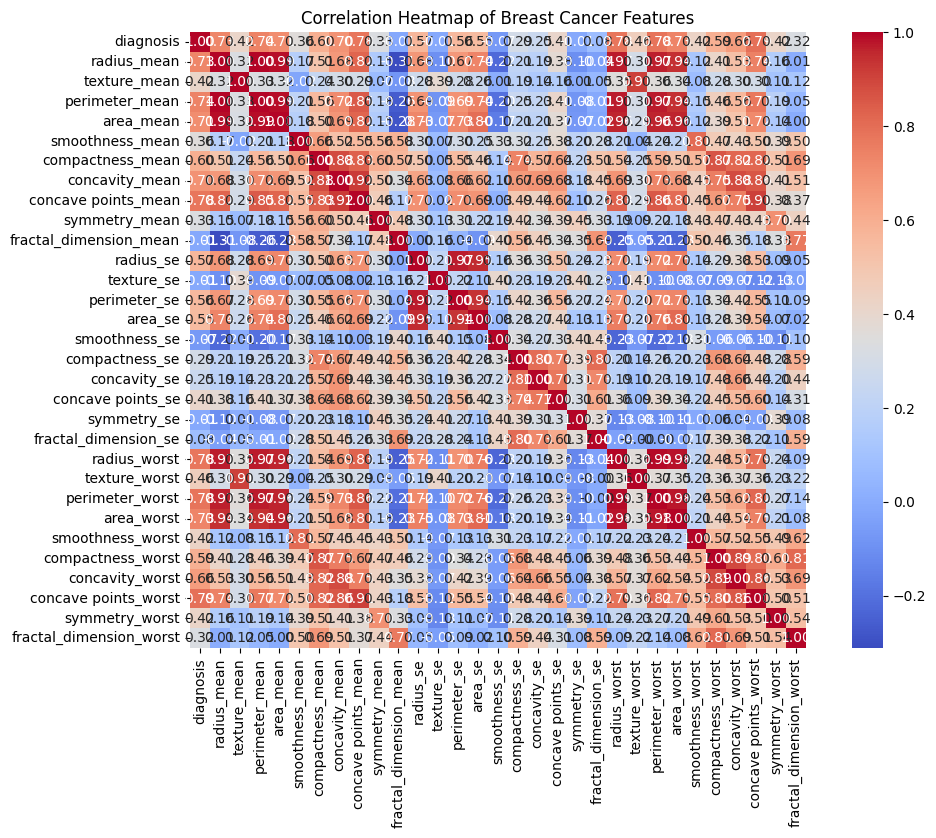

In [17]:
# Analyze the correlation between features
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)  # Create the heatmap with annotations
plt.title('Correlation Heatmap of Breast Cancer Features')  # Title of the heatmap
plt.show()  # Display the heatmap

In [18]:
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [19]:
# Get the correlation of the diagnosis column
diagnosis_corr = correlation_matrix['diagnosis']

# Sort the correlations by absolute value and get the top 15 features
top_corr_features = diagnosis_corr.abs().sort_values(ascending=False).head(15)

# Drop the diagnosis itself from the list
#top_corr_features = top_corr_features.drop('diagnosis')

# Create a new DataFrame with the top correlated features
top_features_df = df[top_corr_features.index]

# Display the new DataFrame
print("New DataFrame with the top 15 features correlated with diagnosis:")
top_features_df

New DataFrame with the top 15 features correlated with diagnosis:


,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se
0,1,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589
1,1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398
2,1,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585
3,1,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445
4,1,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673
565,1,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203
566,1,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425
567,1,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,0.27700,0.86810,0.7260,5.772


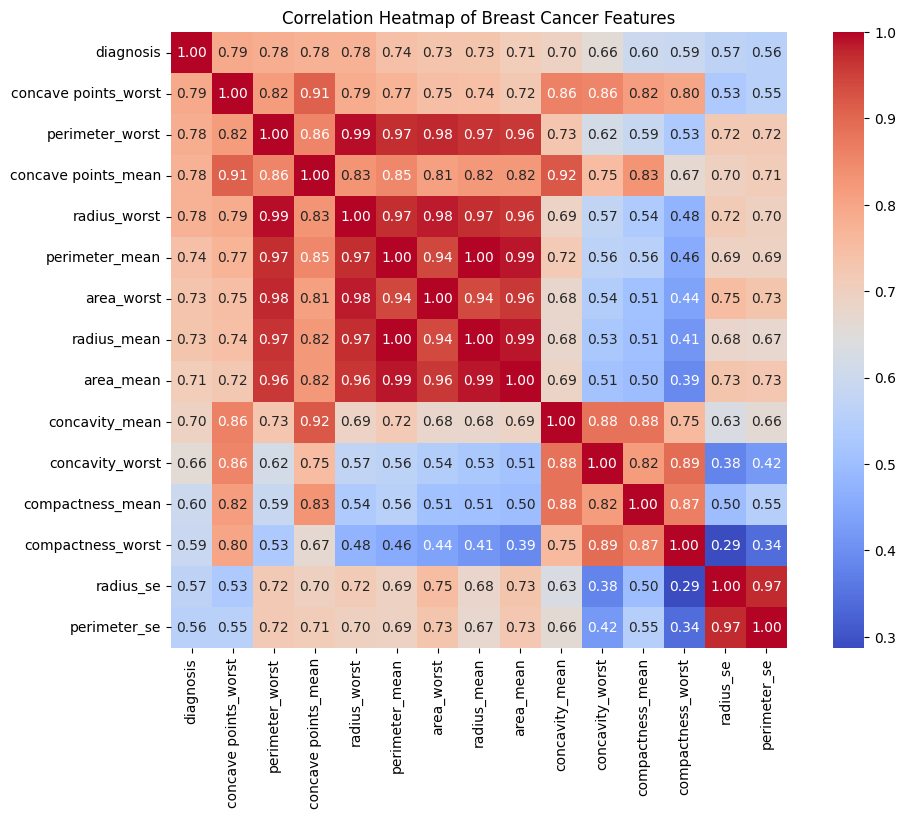

In [20]:
top_feature_corr_mat = top_features_df.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(top_feature_corr_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True)  # Create the heatmap with annotations
plt.title('Correlation Heatmap of Breast Cancer Features')  # Title of the heatmap
plt.show()  # Display the heatmap

In [21]:
top_feature_corr_mat

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se
diagnosis,1.000000,0.793566,0.782914,0.776614,0.776454,0.742636,0.733825,0.730029,0.708984,0.696360,0.659610,0.596534,0.590998,0.567134,0.556141
concave points_worst,0.793566,1.000000,0.816322,0.910155,0.787424,0.771241,0.747419,0.744214,0.722017,0.861323,0.855434,0.815573,0.801080,0.531062,0.554897
perimeter_worst,0.782914,0.816322,1.000000,0.855923,0.993708,0.970387,0.977578,0.965137,0.959120,0.729565,0.618344,0.590210,0.529408,0.719684,0.721031
concave points_mean,0.776614,0.910155,0.855923,1.000000,0.830318,0.850977,0.809630,0.822529,0.823269,0.921391,0.752399,0.831135,0.667454,0.698050,0.710650
radius_worst,0.776454,0.787424,0.993708,0.830318,1.000000,0.969476,0.984015,0.969539,0.962746,0.688236,0.573975,0.535315,0.475820,0.715065,0.697201
perimeter_mean,0.742636,0.771241,0.970387,0.850977,0.969476,1.000000,0.941550,0.997855,0.986507,0.716136,0.563879,0.556936,0.455774,0.691765,0.693135
area_worst,0.733825,0.747419,0.977578,0.809630,0.984015,0.941550,1.000000,0.941082,0.959213,0.675987,0.543331,0.509604,0.438296,0.751548,0.730713
radius_mean,0.730029,0.744214,0.965137,0.822529,0.969539,0.997855,0.941082,1.000000,0.987357,0.676764,0.526911,0.506124,0.413463,0.679090,0.674172
area_mean,0.708984,0.722017,0.959120,0.823269,0.962746,0.986507,0.959213,0.987357,1.000000,0.685983,0.512606,0.498502,0.390410,0.732562,0.726628
concavity_mean,0.696360,0.861323,0.729565,0.921391,0.688236,0.716136,0.675987,0.676764,0.685983,1.000000,0.884103,0.883121,0.754968,0.631925,0.660391


* ### Result Analysis
 #### concave and increasing perimeter of tumor area is a red flag for Malignant diagnosis

# **Modeling**

In [22]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
top_features_df

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se
0,1,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589
1,1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398
2,1,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585
3,1,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445
4,1,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673
565,1,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203
566,1,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425
567,1,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,0.27700,0.86810,0.7260,5.772


## **Splitting Data**

In [24]:
# Splintting to labels and features
X = top_features_df.drop('diagnosis', axis=1)
y = top_features_df['diagnosis']

In [25]:
# First, split into training+validation and test sets (e.g., 80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Then, split the training+validation set into training and validation sets (e.g., 80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=True)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (364, 14)
Validation set shape: (91, 14)
Test set shape: (114, 14)


 ## **Scaling**

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## **Applied Models**
* ### Logistic Regresion
* ### Decision Tree
* ### RandomForest Classifier
* ### Support Vector Machine (SVM) 
* ### Neural Network (NN)

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train models and evaluate on validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"\n {model_name} Validation Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_val_pred))



 Logistic Regression Validation Accuracy: 0.9451
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.92      0.94      0.93        36

    accuracy                           0.95        91
   macro avg       0.94      0.94      0.94        91
weighted avg       0.95      0.95      0.95        91


 Decision Tree Validation Accuracy: 0.9011
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.83      0.94      0.88        36

    accuracy                           0.90        91
   macro avg       0.89      0.91      0.90        91
weighted avg       0.91      0.90      0.90        91


 Random Forest Validation Accuracy: 0.9451
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.92      0.94      0.93        36

    accuracy                           0.95 

## **Evaluation**

In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Initialize a list to store model names and metrics
model_metrics = []

# Evaluate on the test set
for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Extract precision, recall, and F1 score for the positive class (1)
    precision = report['1']['precision'] if '1' in report else 0.0
    recall = report['1']['recall'] if '1' in report else 0.0
    f1_score = report['1']['f1-score'] if '1' in report else 0.0
    
    # Append model metrics to the list
    model_metrics.append({
        'Model': model_name,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })

# Create a DataFrame from the list
accuracies_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print(accuracies_df)


                    Model  Test Accuracy  Precision    Recall  F1 Score
0     Logistic Regression       0.964912   0.953488  0.953488  0.953488
1           Decision Tree       0.956140   0.931818  0.953488  0.942529
2           Random Forest       0.956140   0.952381  0.930233  0.941176
3  Support Vector Machine       0.956140   0.975000  0.906977  0.939759
4          Neural Network       0.973684   0.954545  0.976744  0.965517


In [29]:
accuracies_df

,Model,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.964912,0.953488,0.953488,0.953488
1,Decision Tree,0.956140,0.931818,0.953488,0.942529
2,Random Forest,0.956140,0.952381,0.930233,0.941176
3,Support Vector Machine,0.956140,0.975000,0.906977,0.939759
4,Neural Network,0.973684,0.954545,0.976744,0.965517


## **Comparing  Models**

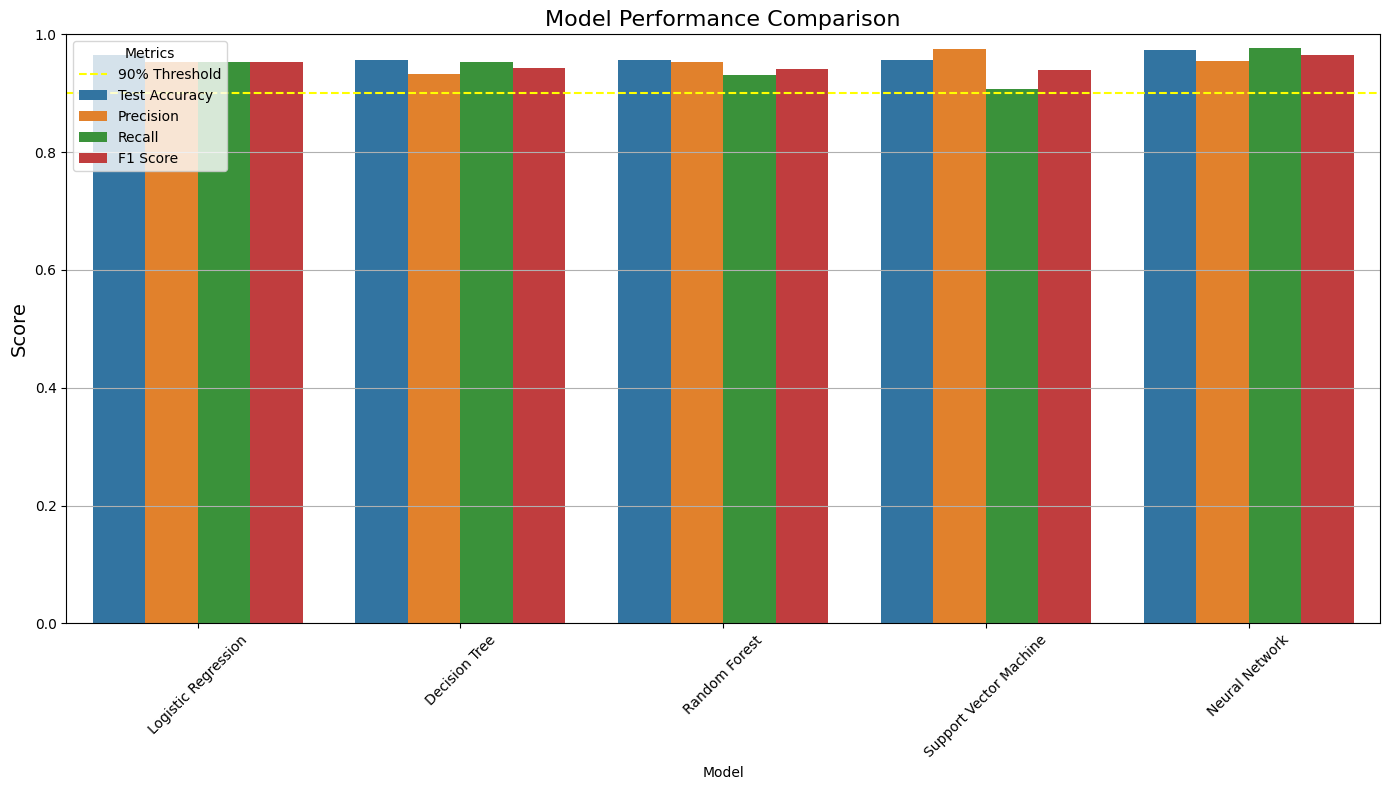

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame
results_df = accuracies_df

# Set the figure size
plt.figure(figsize=(14, 8))

# Melt the DataFrame to have a long format for easier plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Create a bar plot
sns.barplot(data=results_melted, x="Model", y="Value", hue="Metric")

# Customize the plot
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set limits for y-axis
plt.axhline(0.9, color='yellow', linestyle='--', label='90% Threshold')  # Optional threshold line
plt.legend(title='Metrics', loc='upper left')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


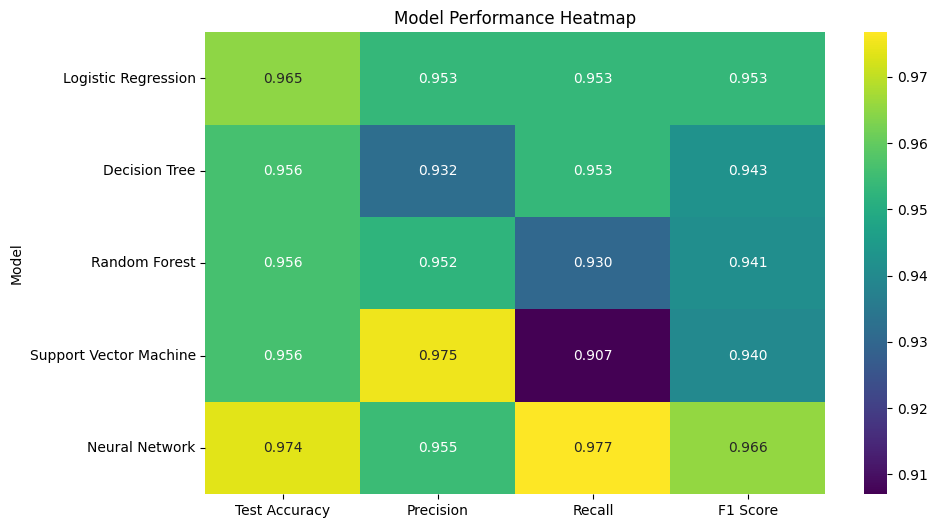

In [31]:
import seaborn as sns

# Set the index to Model
heatmap_df = results_df.set_index('Model')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt=".3f")
plt.title('Model Performance Heatmap')
plt.show()


## Summary

* ### Overall, the Neural Network achieved the highest accuracy (97.37%) and F1 score (96.55%), demonstrating its effectiveness in classifying breast cancer cases.

* ### Logistic Regression also performed well, with high precision and recall, making it a reliable choice for diagnosis.

* ### Support Vector Machine has the highest precision among all models but has a slightly lower recall, which could be improved.

* ### Both Random Forest and Decision Tree showed solid performances, although they lagged slightly in accuracy compared to Neural Networks.

# **Recommendations and Practical Applications**


## **Improving Early Screening:**

* #### Developing Detection Tools: Based on the model results, intelligent tools can be developed that rely on AI to assist in the early detection of breast cancer. These tools could analyze mammography images or clinical data to provide accurate predictions.

## **For Early Diagnosis at home these instructions could help you:**
* #### https://youtu.be/aeKdZ7aPfwg?si=3-uuLF7mkHFEDWZu

## **Awareness and Education:**

* #### Targeted Awareness Programs: Results from the models can be used to create awareness campaigns targeting women in high-risk groups for breast cancer. For instance, if your model shows that specific features are associated with increased risk, this group can be targeted with crucial information about regular screenings.

## **Personalized Screening Plans:**

* #### Customized Screening Plans: The results can help tailor screening plans based on individual characteristics, thereby increasing the effectiveness of early detection.

## **Supporting Physicians in Decision-Making:**

* #### Decision Support Systems: Models can be integrated into decision support systems to assist doctors in risk assessment and help patients make informed choices about screening and treatment.